In [1]:
from collections import namedtuple
import pandas as pd, numpy as np
import dash
from dash import dcc, html
import plotly.express as px

/Users/mariaolivacalero/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [167]:
df = pd.read_csv('MyData/history.csv', index_col = 0)
df.shape

(30272, 26)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30272 entries, 0 to 30271
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              30272 non-null  object 
 1   endTime           30272 non-null  object 
 2   artistName        30272 non-null  object 
 3   trackName         30272 non-null  object 
 4   msPlayed          30272 non-null  int64  
 5   datetime          30272 non-null  object 
 6   danceability      30272 non-null  float64
 7   energy            30272 non-null  float64
 8   key               30272 non-null  int64  
 9   loudness          30272 non-null  float64
 10  mode              30272 non-null  int64  
 11  speechiness       30272 non-null  float64
 12  acousticness      30272 non-null  float64
 13  instrumentalness  30272 non-null  float64
 14  liveness          30272 non-null  float64
 15  valence           30272 non-null  float64
 16  tempo             30272 non-null  float64
 17

In [3]:
df.head()

,name,endTime,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,album_id,album_name
number,,,,,,,,,,,,,,,,,,,,,
0,Que Alegria Mas Tonta___Pereza,2022-11-09 00:01,Pereza,Que Alegria Mas Tonta,29858,2022-11-09 00:01:00,0.628,0.911,10,-3.177,...,128.861,audio_features,09pHfOLKeTx3txsUtxPpvR,spotify:track:09pHfOLKeTx3txsUtxPpvR,https://api.spotify.com/v1/tracks/09pHfOLKeTx3...,https://api.spotify.com/v1/audio-analysis/09pH...,181680,4,6TFvbSAqnlvjOSkuryxUKe,Animales
1,Bañarnos en Vaqueros___Sofia Ellar,2022-11-09 00:02,Sofia Ellar,Bañarnos en Vaqueros,221630,2022-11-09 00:02:00,0.645,0.614,6,-6.953,...,95.978,audio_features,6xvTbeuhoQMzRqmFeZr3tQ,spotify:track:6xvTbeuhoQMzRqmFeZr3tQ,https://api.spotify.com/v1/tracks/6xvTbeuhoQMz...,https://api.spotify.com/v1/audio-analysis/6xvT...,221631,4,2XM0HxGntoa0QJcSX9Gk9f,Bañarnos en Vaqueros
2,Para Que el Mundo lo Vea___Arnau Griso,2022-11-09 00:06,Arnau Griso,Para Que el Mundo lo Vea,232747,2022-11-09 00:06:00,0.663,0.737,8,-6.296,...,90.987,audio_features,4dqR44eVmK4S9gbJPcxQWW,spotify:track:4dqR44eVmK4S9gbJPcxQWW,https://api.spotify.com/v1/tracks/4dqR44eVmK4S...,https://api.spotify.com/v1/audio-analysis/4dqR...,232747,4,4DImcSLrz8KPotPPFctfiv,Revolución Bananera
3,No Puedo Vivir Sin Ti___El Canto Del Loco,2022-11-09 00:09,El Canto Del Loco,No Puedo Vivir Sin Ti,214960,2022-11-09 00:09:00,0.666,0.834,0,-3.314,...,129.982,audio_features,3K8BeABgLXZ3JHhdM3rZBx,spotify:track:3K8BeABgLXZ3JHhdM3rZBx,https://api.spotify.com/v1/tracks/3K8BeABgLXZ3...,https://api.spotify.com/v1/audio-analysis/3K8B...,214960,4,3ccUQA3LcKnQN28rHI597A,Por Mi y por Todos Mis Compañeros
4,Copenhague___Eva B,2022-11-09 00:11,Eva B,Copenhague,121584,2022-11-09 00:11:00,0.576,0.787,9,-6.363,...,93.001,audio_features,40IWFXz1cOoeuURmOeOILC,spotify:track:40IWFXz1cOoeuURmOeOILC,https://api.spotify.com/v1/tracks/40IWFXz1cOoe...,https://api.spotify.com/v1/audio-analysis/40IW...,151774,4,766C7r1vSvIalNiUcGE1fX,Copenhague


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30272 entries, 0 to 30271
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              30272 non-null  object 
 1   endTime           30272 non-null  object 
 2   artistName        30272 non-null  object 
 3   trackName         30272 non-null  object 
 4   msPlayed          30272 non-null  int64  
 5   datetime          30272 non-null  object 
 6   danceability      30272 non-null  float64
 7   energy            30272 non-null  float64
 8   key               30272 non-null  int64  
 9   loudness          30272 non-null  float64
 10  mode              30272 non-null  int64  
 11  speechiness       30272 non-null  float64
 12  acousticness      30272 non-null  float64
 13  instrumentalness  30272 non-null  float64
 14  liveness          30272 non-null  float64
 15  valence           30272 non-null  float64
 16  tempo             30272 non-null  float64
 17

In [5]:
#tracks playing time
df['secPlayed'] = df['msPlayed'] / 1000
df = df[df.columns[:-1].insert(4, df.columns[-1])] #moving seconds column to proper place
df = df[df.secPlayed > 60] #removing songs that were played for less than 60 secs 
                            # me quito 60000 reproducciones
df.shape

(23617, 27)

In [6]:
#identifying the month
df['month'] = df.endTime.str.split('-').apply(lambda x: (x[0], x[1]))

In [7]:
#listing months and features
months = list(set(df.month.values))
months.sort()
features = ['danceability', 'energy', 'speechiness', 'instrumentalness', 'valence']

In [8]:
#standardizing features (we're interested not in their absolute value, but in how each changed over time)
for feature in features:
    df[f'{feature}_zscore'] = ( df[feature] - df[feature].mean() ) / df[feature].std()

In [9]:

#making sure we standardized correctly: mean is 0 and std is 1
df[[feature + '_zscore' for feature in features]].describe().loc['mean':'std'].T

,mean,std
danceability_zscore,-4.055602e-16,1.0
energy_zscore,-1.059030e-16,1.0
speechiness_zscore,1.083099e-16,1.0
instrumentalness_zscore,2.406886e-17,1.0
valence_zscore,-2.202300e-16,1.0


In [10]:
#features averages by month
Month = namedtuple('Month', features)
avg_features_months = []
for month in months:
    df_month = df[df['month'] == month]
    avg_features = df_month.describe().loc['mean'][[feature + '_zscore' for feature in features]]
    month = Month(*avg_features)
    avg_features_months.append(month)

In [11]:
#labelling months
month_labels = [f'{month[1]}/{month[0]}' for month in months]
month_labels_short = [m[:3]+m[-2:] for m in month_labels]

In [14]:
import plotly.graph_objects as go

# Sample data
features = ['valence', 'energy', 'danceability', 'speechiness', 'instrumentalness'']
x = [-1] + [x for x in range(13)]

# Create traces for each feature
traces = []
for feature in features:
    y = [getattr(month, feature) for month in avg_features_months]
    traces.append(go.Scatter(x=x, y=y, mode='lines+markers', name=feature))

# Create the layout
layout = go.Layout(
    title='My mood in 2022 (According to Spotify)',
    xaxis=dict(
        title='Months',
        tickmode='array',
        tickvals=list(range(13)),
        ticktext=month_labels_short,
    ),
    yaxis=dict(
        title='Mood',
    ),
    showlegend=True,
)

# Add annotations
annotations = [
    dict(x=1, y=0.4, xref="x", yref="y", text="Studying", showarrow=True, arrowhead=5, ax=0, ay=-40, font=dict(size=14)),
    dict(x=4.15, y=0.4, xref="x", yref="y", text="Travelling", showarrow=True, arrowhead=5, ax=0, ay=-40, font=dict(size=14)),
    dict(x=6.75, y=0.4, xref="x", yref="y", text="Graduating", showarrow=True, arrowhead=5, ax=0, ay=-40, font=dict(size=14)),
    dict(x=10.35, y=0.4, xref="x", yref="y", text="Back to school", showarrow=True, arrowhead=5, ax=0, ay=-40, font=dict(size=14)),
]

layout['annotations'] = annotations

# Create the figure
fig = go.Figure(data=traces, layout=layout)

# Show the figure
fig.show()



In [15]:
# converting ms to minute and extracting date from datetime column
df['mins_played'] = df.apply(lambda x: round(x['msPlayed']/60000,2), axis=1)
df['date'] = df.apply(lambda x: pd.to_datetime(x['datetime'][:10],format='%Y-%m-%d'),axis=1)

# calculate the daily streaming time length 
daily_length = df.groupby('date',as_index=True).sum()

# create new date series for displaying time series data
idx = pd.DataFrame(pd.date_range(min(df.date), max(df.date)),columns=['date'])
idx['date'] = idx.apply(lambda x: pd.to_datetime(x['date'],format='%Y-%m-%d'),axis=1)

# use new date series to display the daily streaming time
new_daily_length = pd.merge(idx, daily_length, how='left', left_on='date', right_on = 'date', copy=False)

# getting rid of columns except for date and time
new_daily_length = new_daily_length.drop(new_daily_length.loc[:, 'msPlayed':'time_signature'], axis=1)




In [16]:
new_daily_length.head()


,date,name,endTime,artistName,trackName,secPlayed,album_id,album_name,month,danceability_zscore,energy_zscore,speechiness_zscore,instrumentalness_zscore,valence_zscore,mins_played
0,2022-11-09,Bañarnos en Vaqueros___Sofia EllarPara Que el ...,2022-11-09 00:022022-11-09 00:062022-11-09 00:...,Sofia EllarArnau GrisoEl Canto Del LocoEva BMa...,Bañarnos en VaquerosPara Que el Mundo lo VeaNo...,10799.802,2XM0HxGntoa0QJcSX9Gk9f4DImcSLrz8KPotPPFctfiv3c...,Bañarnos en VaquerosRevolución BananeraPor Mi ...,"(2022, 11, 2022, 11, 2022, 11, 2022, 11, 2022,...",-6.742601,-13.403686,-7.594766,14.615580,-0.815722,179.99
1,2022-11-10,"Quevedo: Bzrp Music Sessions, Vol. 52___Bizarr...",2022-11-10 21:362022-11-10 21:382022-11-10 21:...,BizarrapFacundo MajdalaniManuel TurizoTers,"Quevedo: Bzrp Music Sessions, Vol. 52PegaoLa B...",671.424,4PNqWiJAfjj32hVvlchV5u0ITiVEYDdB5CPppQyyUEcL1T...,"Quevedo: Bzrp Music Sessions, Vol. 52PegaoLa B...","(2022, 11, 2022, 11, 2022, 11, 2022, 11)",3.457092,1.653061,0.585892,-0.281187,1.992298,11.19
2,2022-11-11,I'm Yours___Jason MrazHigh On Life (feat. Bonn...,2022-11-11 11:382022-11-11 11:432022-11-11 11:...,Jason MrazMartin GarrixStephen DawesBruno Mars...,I'm YoursHigh On Life (feat. Bonn)Teenage Drea...,3895.919,04G0YylSjvDQZrjOfE5jA51GUfof1gHsqYjoHFym3aim1U...,We Sing. We Dance. We Steal Things.High On Lif...,"(2022, 11, 2022, 11, 2022, 11, 2022, 11, 2022,...",-13.372472,-28.882529,-11.407135,-2.884921,-10.583172,64.92
3,2022-11-12,Teenage Dream___Stephen DawesTeenage Dream___S...,2022-11-12 11:252022-11-12 11:282022-11-12 11:...,Stephen DawesStephen DawesStephen DawesStephen...,Teenage DreamTeenage DreamTeenage DreamTeenage...,5484.930,1UH6aVsmnWRjsB5Tq0qUhF1UH6aVsmnWRjsB5Tq0qUhF1U...,Teenage DreamTeenage DreamTeenage DreamTeenage...,"(2022, 11, 2022, 11, 2022, 11, 2022, 11, 2022,...",0.091120,-20.637692,-10.877145,-4.163233,-10.926665,91.39
4,2022-11-13,"Quevedo: Bzrp Music Sessions, Vol. 52___Bizarr...",2022-11-13 12:302022-11-13 12:312022-11-13 12:...,BizarrapReyanna MariaMalmö 040Malmö 040Malmö 0...,"Quevedo: Bzrp Music Sessions, Vol. 52So Pretty...",1044.892,4PNqWiJAfjj32hVvlchV5u3K1FmvfuKFjry1x6sL405k4k...,"Quevedo: Bzrp Music Sessions, Vol. 52So Pretty...","(2022, 11, 2022, 11, 2022, 11, 2022, 11, 2022,...",1.560325,-1.458658,0.593503,-0.341605,-3.213744,17.44


In [17]:
import datetime
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import numpy as np
from dash import dcc
from dash import html
import dash

	

In [18]:
def display_year(
    z,
    year: int = None,
    month_lines: bool = True,
    fig=None,
    row: int = None
):
    
    if year is None:
        year = datetime.datetime.now().year
        
    d1 = datetime.date(year, 1, 1)
    d2 = datetime.date(year, 12, 31)

    number_of_days = (d2-d1).days + 1
    
    data = np.ones(number_of_days) * np.nan
    data[:len(z)] = z
    

    d1 = datetime.date(year, 1, 1)
    d2 = datetime.date(year, 12, 31)

    delta = d2 - d1
    
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    month_days =   [31,    28,    31,     30,    31,     30,    31,    31,    30,    31,    30,    31]
    if number_of_days == 366:  # leap year
        month_days[1] = 29
    month_positions = (np.cumsum(month_days) - 15)/7

    dates_in_year = [d1 + datetime.timedelta(i) for i in range(delta.days+1)] # list with datetimes for each day a year
    weekdays_in_year = [i.weekday() for i in dates_in_year] # gives [0,1,2,3,4,5,6,0,1,2,3,4,5,6,…] (ticktext in xaxis dict translates this to weekdays
    
    weeknumber_of_dates = []
    for i in dates_in_year:
        inferred_week_no = int(i.strftime("%V"))
        if inferred_week_no >= 52 and i.month == 1:
            weeknumber_of_dates.append(0)
        elif inferred_week_no == 1 and i.month == 12:
            weeknumber_of_dates.append(53)
        else:
            weeknumber_of_dates.append(inferred_week_no)
    
    text = [str(i) for i in dates_in_year] #gives something like list of strings like ‘2018-01-25’ for each date. Used in data trace to make good hovertext.
    #4cc417 green #347c17 dark green
    colorscale=[[False, '#eeeeee'], [True, '#76cf63']]
    
    # handle end of year
    

    data = [
        go.Heatmap(
            x=weeknumber_of_dates,
            y=weekdays_in_year,
            z=data,
            text=text,
            hoverinfo='text',
            xgap=3, # this
            ygap=3, # and this is used to make the grid-like apperance
            showscale=False,
            colorscale=colorscale
        )
    ]
    
        
    if month_lines:
        kwargs = dict(
            mode='lines',
            line=dict(
                color='#9e9e9e',
                width=1,
            ),
            hoverinfo='skip',
        )
        
        for date, dow, wkn in zip(
            dates_in_year, weekdays_in_year, weeknumber_of_dates
        ):
            if date.day == 1:
                data += [
                    go.Scatter(
                        x=[wkn-.5, wkn-.5],
                        y=[dow-.5, 6.5],
                        **kwargs,
                    )
                ]
                if dow:
                    data += [
                    go.Scatter(
                        x=[wkn-.5, wkn+.5],
                        y=[dow-.5, dow - .5],
                        **kwargs,
                    ),
                    go.Scatter(
                        x=[wkn+.5, wkn+.5],
                        y=[dow-.5, -.5],
                        **kwargs,
                    )
                ]
                    
                    
    layout = go.Layout(
        title='My Spotify Activity',
        height=250,
        yaxis=dict(
            showline=False, showgrid=False, zeroline=False,
            tickmode='array',
            ticktext=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
            tickvals=[0, 1, 2, 3, 4, 5, 6],
            autorange="reversed",
        ),
        xaxis=dict(
            showline=False, showgrid=False, zeroline=False,
            tickmode='array',
            ticktext=month_names,
            tickvals=month_positions,
        ),
        font={'size':10, 'color':'#9e9e9e'},
        plot_bgcolor=('#fff'),
        margin = dict(t=40),
        showlegend=False,
    )

    if fig is None:
        fig = go.Figure(data=data, layout=layout)
    else:
        fig.add_traces(data, rows=[(row+1)]*len(data), cols=[1]*len(data))
        fig.update_layout(layout)
        fig.update_xaxes(layout['xaxis'])
        fig.update_yaxes(layout['yaxis'])

    
    return fig


def display_years(z, years):
    
    day_counter = 0
    
    fig = make_subplots(rows=len(years), cols=1, subplot_titles=years)
    for i, year in enumerate(years):
        d1 = datetime.date(year, 1, 1)
        d2 = datetime.date(year, 12, 31)
        
        number_of_days = (d2-d1).days + 1
        data = z[day_counter : day_counter + number_of_days]
        
        display_year(data, year=year, fig=fig, row=i)
        fig.update_layout(height=250*len(years))
        day_counter += number_of_days
    return fig



In [19]:
z = [0]* 312
for i in new_daily_length["secPlayed"]:
    z.append(i)
len(z)
display_years(z,(2022,2023))


In [20]:

z.append(new_daily_length["secPlayed"])

In [21]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go

# Assuming 'avg_features_months' and 'month_labels_short' are defined

# Features to display
features = ['danceability', 'energy','valence','speechiness','instrumentalness']


# Create traces for each feature
traces = []
for feature in features:
    y = [getattr(month, feature) for month in avg_features_months]
    traces.append(go.Scatter(x=x, y=y, mode='lines+markers', name=feature))

# Create the layout
layout = go.Layout(
    title='My mood during last year (According to Spotify)',
    xaxis=dict(
        title='Months',
        tickmode='array',
        tickvals=list(range(13)),
        ticktext=month_labels_short,
    ),
    yaxis=dict(
        title='Mood',
    ),
    showlegend=True,
)

# Add annotations
annotations = [
    dict(x=1, y=0.4, xref="x", yref="y", text="Studying", showarrow=True, arrowhead=5, ax=0, ay=-40, font=dict(size=14)),
    dict(x=4.15, y=0.4, xref="x", yref="y", text="Graduating", showarrow=True, arrowhead=5, ax=0, ay=-40, font=dict(size=14)),
    dict(x=6.5, y=0.4, xref="x", yref="y", text="Unemployed", showarrow=True, arrowhead=5, ax=0, ay=-40, font=dict(size=14)),
    dict(x=10.35, y=0.4, xref="x", yref="y", text="First Job", showarrow=True, arrowhead=5, ax=0, ay=-40, font=dict(size=14)),
]

layout['annotations'] = annotations

# Create the figure
fig = go.Figure(data=traces, layout=layout)

# Create the Dash app
app = dash.Dash(__name__)

# Define the app layout
app.layout = html.Div(children=[
    # Dropdown selector for features
    dcc.Dropdown(
        id='feature-selector',
        options=[{'label': feature, 'value': feature} for feature in features],
        value=features,  # Initial selected features
        multi=True  # Allow multiple selection
    ),
    # Graph component
    dcc.Graph(
        id='mood-graph',
        figure=fig
    )
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


/var/folders/d7/fq94_spj7t7185m44s3lzkrc0000gn/T/ipykernel_73318/1281034444.py:2: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

/var/folders/d7/fq94_spj7t7185m44s3lzkrc0000gn/T/ipykernel_73318/1281034444.py:3: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`

Address already in use
Port 8050 is in use by another program. Either identify and stop that program, or start the server with a different port.


AttributeError: 'tuple' object has no attribute 'tb_frame'

In [22]:
artist = df.drop(columns=["date"])
artist_length = artist.groupby('artistName',as_index=False).sum()
artist_song_cnt = artist.groupby('artistName',as_index=False).agg({"trackName": "nunique"})

# merge artist_length and artist_song_cnt 
artist_length_uniqsong = pd.merge(artist_length,artist_song_cnt,how='left',on='artistName',copy=False)
artist_length_uniqsong.rename(columns={'trackName':'unique_track_number'},inplace=True)

# sorting the df by minutes played
max_time  = artist_length_uniqsong.sort_values(by=['mins_played'])

# top 30 artist I listen to (tail because the df is in ascending order of count of minutes)
most_heard_30 = max_time.tail(30)

In [23]:
most_heard_30

,artistName,name,endTime,trackName_x,secPlayed,msPlayed,datetime,danceability,energy,key,...,album_id,album_name,month,danceability_zscore,energy_zscore,speechiness_zscore,instrumentalness_zscore,valence_zscore,mins_played,trackName_y
556,Justin Bieber,Baby___Justin BieberOne Less Lonely Girl___Jus...,2022-11-14 17:552022-11-14 17:592022-11-14 18:...,BabyOne Less Lonely GirlFriends (with BloodPop...,27734.703,27734703,2022-11-14 17:55:002022-11-14 17:59:002022-11-...,95.401,95.73200,650,...,3BmcYMh0KYsimWL6p2gPa91rG5TDs3jYh6OU753I54CI7h...,My World 2.0My WorldFriends (with BloodPop®)Pu...,"(2022, 11, 2022, 11, 2022, 11, 2022, 11, 2022,...",5.398727,-5.790652,103.351322,-20.409014,-23.789010,462.40,21
988,Sebastian Yatra,Un Año___Sebastian YatraTacones Rojos___Sebast...,2022-12-03 19:522022-12-07 11:102022-12-10 18:...,Un AñoTacones RojosTacones RojosTacones RojosU...,28164.242,28164242,2022-12-03 19:52:002022-12-07 11:10:002022-12-...,92.709,96.23700,898,...,4Vtx3PxyOfBUBuEYAIocsP4mdWMx4VouAqsIqgLt3R6S4m...,Un AñoTacones RojosTacones RojosTacones RojosU...,"(2022, 12, 2022, 12, 2022, 12, 2022, 12, 2022,...",-28.187453,-11.051893,-55.986891,-20.918138,98.192833,469.35,22
856,Ozuna,Hey Mor___OzunaHey Mor___OzunaHey Mor___OzunaH...,2022-11-18 11:092022-11-20 14:132022-11-20 14:...,Hey MorHey MorHey MorHey MorHey MorHey MorHey ...,29110.266,29110266,2022-11-18 11:09:002022-11-20 14:13:002022-11-...,131.994,102.11600,421,...,1kjfMVBNhsDeRyAu9zbLfF1kjfMVBNhsDeRyAu9zbLfF1k...,OzuTochiOzuTochiOzuTochiOzuTochiOzuTochiOzuToc...,"(2022, 11, 2022, 11, 2022, 11, 2022, 11, 2022,...",228.236298,-29.120474,288.743518,-22.416507,-57.902278,485.43,26
712,Maikel Delacalle,Replay___Maikel DelacalleReplay___Maikel Delac...,2022-12-21 11:062022-12-21 16:252022-12-28 10:...,ReplayReplayReplayReplayReplayReplayReplayRepl...,29825.622,29825622,2022-12-21 11:06:002022-12-21 16:25:002022-12-...,103.802,96.58200,1450,...,6Kawn2OipfPSwm0i6EL2kd6Kawn2OipfPSwm0i6EL2kd6K...,ReplayReplayReplayReplayReplayReplayReplayRepl...,"(2022, 12, 2022, 12, 2022, 12, 2022, 12, 2023,...",114.414293,28.883636,31.266128,-19.469548,65.013866,497.38,9
12,Abraham Mateo,Quiero Decirte___Abraham MateoQuiero Decirte__...,2022-12-31 13:452022-12-31 13:492022-12-31 13:...,Quiero DecirteQuiero DecirteQuiero DecirteQuie...,30465.958,30465958,2022-12-31 13:45:002022-12-31 13:49:002022-12-...,106.911,110.33800,589,...,3CnYoRJD1BVt5eyoRwaFar3CnYoRJD1BVt5eyoRwaFar3C...,Quiero DecirteQuiero DecirteQuiero DecirteQuie...,"(2022, 12, 2022, 12, 2022, 12, 2023, 01, 2023,...",101.628011,84.941998,-84.348781,-20.630979,220.751165,508.21,4
332,Ed Sheeran,The A Team___Ed SheeranGalway Girl___Ed Sheera...,2022-11-12 11:422022-11-12 11:452022-11-12 11:...,The A TeamGalway GirlPhotographPerfectCastle o...,30503.772,30503772,2022-11-12 11:42:002022-11-12 11:45:002022-11-...,87.562,67.19470,856,...,0W5GGnapMz0VwemQvJDqa73T4tUhGYeRNVUGevb0wThu1x...,+÷ (Deluxe)x (Deluxe Edition)÷ (Deluxe)÷ (Delu...,"(2022, 11, 2022, 11, 2022, 11, 2022, 11, 2022,...",-37.979723,-166.268092,-33.919067,-19.236474,-92.896214,508.45,32
897,Pole.,Si te preguntan___Pole.Hemos Bebido Demasiado_...,2022-11-09 00:232022-11-14 20:432022-11-15 13:...,Si te preguntanHemos Bebido DemasiadoHemos Beb...,30612.285,30612285,2022-11-09 00:23:002022-11-14 20:43:002022-11-...,99.791,112.95600,506,...,7uHlCkta19Oakd9R6mrRq67ItEHiBNd0EGCW2P3v1d8s7I...,Si te preguntanHemos Bebido DemasiadoHemos Beb...,"(2022, 11, 2022, 11, 2022, 11, 2022, 11, 2022,...",-13.297358,59.213507,-25.236287,-22.053631,39.350409,510.14,20
98,Bad Bunny,Neverita___Bad BunnyTití Me Preguntó___Bad Bun...,2022-12-20 14:162022-12-20 16:382022-12-21 19:...,NeveritaTití Me PreguntóOjitos LindosDÁKITINev...,31373.225,31373225,2022-12-20 14:16:002022-12-20 16:38:002022-12-...,123.388,101.82100,722,...,3RQQmkQEvNCY4prGKE6oc53RQQmkQEvNCY4prGKE6oc53R...,Un Verano Sin TiUn Verano Sin TiUn Verano Sin ...,"(2022, 12, 2022, 12, 2022, 12, 2022, 12, 2022,...",134.126427,-47.749633,71.643

In [193]:
fig = px.bar(most_heard_30, 
             x='mins_played', 
             y='artistName', 
             orientation='h',  # Set orientation to horizontal for a bar plot
             title='Top 30 Artists Heard',
             labels={'artistName': 'Artist Name', 'mins_played': 'Minutes Played'},
             color_discrete_sequence=['#FF6384'])  # Set your desired color sequence

fig.update_layout(width=800, height=600)  # Adjust the width and height as needed
fig.show()

In [25]:
# create new date series for displaying time series data
idx = pd.DataFrame(pd.date_range(min(df.date), max(df.date)),columns=['date'])
idx['date'] = idx.apply(lambda x: pd.to_datetime(x['date'],format='%Y-%m-%d'),axis=1)

# grouping valence by date
valence = df.groupby('date')['valence'].aggregate(['min', np.mean, 'max'])

# merging the valence and idx df
val = pd.merge(idx, valence, how='left', left_on='date', right_on = 'date', copy=False).fillna(0)

/var/folders/d7/fq94_spj7t7185m44s3lzkrc0000gn/T/ipykernel_73318/33959649.py:6: FutureWarning:

The provided callable <function mean at 0x10f25e700> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



In [26]:
val.head()

,date,min,mean,max
0,2022-11-09,0.00001,0.567775,0.980
1,2022-11-10,0.55000,0.682500,0.850
2,2022-11-11,0.18700,0.463800,0.867
3,2022-11-12,0.16800,0.496241,0.884
4,2022-11-13,0.25000,0.478714,0.682


In [27]:
import plotly.graph_objects as go


# Create an error bar plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=val['date'],
    y=val['mean'],
    mode='markers',
    marker=dict(symbol='triangle-up'),
    error_y=dict(
        type='data',
        symmetric=False,
        array=val['max'] - val['mean'],
        arrayminus=val['mean'] - val['min']
    )
))

# Update layout if needed
fig.update_layout(title='Error Bar Plot Example', width=800, height=400)

# Show the plot
fig.show()


In [29]:
df['date'] = pd.to_datetime(df['date'])

distinct_songs_df = df.groupby(['artistName', 'trackName', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']).first().reset_index()

distinct_songs_df = distinct_songs_df[['artistName', 'trackName', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',"msPlayed"]]


In [40]:
x = distinct_songs_df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

In [41]:
x


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.540,0.0794,10,-20.868,0,0.0480,0.875000,0.902000,0.2920,0.175,60.009
1,0.701,0.7160,7,-3.671,0,0.0361,0.174000,0.000000,0.3240,0.732,91.007
2,0.852,0.3200,0,-14.734,1,0.1830,0.554000,0.229000,0.0909,0.222,100.002
3,0.841,0.5220,9,-8.442,0,0.0698,0.753000,0.028100,0.1090,0.543,109.050
4,0.483,0.5590,9,-8.118,1,0.0643,0.495000,0.000000,0.0944,0.367,172.752
...,...,...,...,...,...,...,...,...,...,...,...
3532,0.587,0.7320,8,-5.288,1,0.0378,0.000739,0.000000,0.0846,0.656,119.938
3533,0.644,0.4370,0,-8.123,1,0.0356,0.572000,0.000000,0.2020,0.667,145.245
3534,0.620,0.6080,7,-4.780,1,0.0290,0.201000,0.000000,0.0625,0.608,139.066
3535,0.730,0.5670,8,-9.259,1,0.0344,0.497000,0.000087,0.1560,0.841,120.036


In [32]:
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation
from sklearn.metrics import (
    adjusted_mutual_info_score,
    homogeneity_score,
    completeness_score,
    silhouette_score,
    v_measure_score,
    adjusted_rand_score
)
     

In [33]:
from sklearn.decomposition import PCA

from sklearn import preprocessing
# scale the data for better results
x_scaled = preprocessing.scale(x)

In [42]:
pca = PCA(n_components=2)
PCA_dim = pca.fit_transform(x)

In [43]:
pca_df = pd.DataFrame(
    data = PCA_dim,
    columns = ['PC1', 'PC2'])


In [44]:
fig = px.scatter(pca_df, x='PC1', y='PC2',
     opacity=0.8, size_max=10,)

In [45]:
fig

In [38]:
from sklearn.manifold import TSNE
     

X_tsne = TSNE(learning_rate=100).fit_transform(x_scaled)
     

fig = px.scatter(X_tsne[:, 0], X_tsne[:, 1])

In [39]:
fig

In [47]:
max_songs = unique_songs_df.sort_values(by=["msPlayed"])

unique_songs_df.tail(10)

In [48]:
max_songs.tail(20)

,artistName,trackName,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,msPlayed
382,Bermu,TU VERANO EN ROMA,0.639,0.66100,5.0,-7.298,1.0,0.0459,0.2560,0.000000,0.1300,0.54900,74.990,26444111
2291,Musicas para Relaxar,Chuva Suave para Dormir,0.148,0.97400,1.0,-30.935,1.0,0.0584,0.1440,0.995000,0.8340,0.00001,67.747,26600893
1708,LIT killah,Los del Espacio,0.813,0.68200,0.0,-3.598,1.0,0.0402,0.1070,0.000000,0.1080,0.63400,120.011,26626524
377,Bermu,SOMOS UNO EN DOS,0.591,0.67900,10.0,-8.486,1.0,0.0372,0.6600,0.042400,0.2010,0.89200,179.907,26943988
1056,Enol,SANTORINI (feat. Marmi),0.728,0.78100,8.0,-6.349,1.0,0.0336,0.0799,0.000000,0.0985,0.76000,140.021,27706416
1141,Feid,ATEO,0.457,0.42000,4.0,-7.270,1.0,0.1030,0.9040,0.000000,0.0988,0.26100,87.035,28293655
3481,iñigo quintero,Si No Estás,0.537,0.42100,5.0,-8.720,1.0,0.0285,0.8270,0.000000,0.1380,0.52400,98.224,28433779
2916,Saiko,Supernova,0.725,0.74300,10.0,-4.185,0.0,0.1480,0.2560,0.000000,0.0934,0.54200,87.979,29100406
38,Abraham Mateo,Quiero Decirte,0.751,0.77200,4.0,-3.853,1.0,0.0383,0.0390,0.000000,0.1020,0.92300,117.941,29411486
2744,Quevedo,PLAYA DEL INGLÉS,0.793,0.73600,7.0,-3.254,0.0,0.0469,0.0822,0.000000,0.1090,0.65600,112.993,30409976


In [50]:

from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

/Users/mariaolivacalero/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/mariaolivacalero/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/mariaolivacalero/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/mariaolivacalero/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/maria

In [51]:
import plotly.graph_objects as go

# Create a trace for the line graph
trace = go.Scatter(
    x=list(range(1, 11)),
    y=wcss,
    mode='lines',
    name='WCSS'
)

# Create the layout
layout = go.Layout(
    title='WCSS vs Number of Clusters',
    xaxis=dict(title='Number of Clusters'),
    yaxis=dict(title='WCSS')
)

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

# Show the line graph
fig.show()


In [53]:
kmeans_model = KMeans(5)
kmeans_model.fit(x_scaled)
pca_df['kmeans']=kmeans_model.fit_predict(x_scaled)

/Users/mariaolivacalero/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/mariaolivacalero/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [54]:
import plotly.graph_objects as go

# Create a scatter plot for each cluster
data = []
for cluster in range(5):
    cluster_data = pca_df[pca_df['kmeans'] == cluster]
    trace = go.Scatter(
        x=cluster_data['PC1'],
        y=cluster_data['PC2'],
        mode='markers',
        name=f'Cluster {cluster}',
        marker=dict(
            size=8,
            color=cluster,
            colorscale='Viridis',
            opacity=0.8
        )
    )
    data.append(trace)

# Create the layout
layout = go.Layout(
    title='K-means Clustering Result',
    xaxis=dict(title='PC1'),
    yaxis=dict(title='PC2')
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Show the scatter plot
fig.show()


In [56]:
# Assuming you have already trained the KMeans model and have the cluster labels in pca_df['kmeans']

# Extract the characteristics for each cluster
cluster_characteristics = pca_df.groupby('kmeans').mean()

# Get the list of songs that belong to each cluster
cluster_songs = []
for cluster in range(5):
    songs = pca_df[pca_df['kmeans'] == cluster][['artistName', 'trackName']]
    cluster_songs.append(songs)

# Print the characteristics for each cluster
print(cluster_characteristics)

# Print the list of songs that belong to each cluster
for cluster, songs in enumerate(cluster_songs):
    print(f"Cluster {cluster}:")
    print(songs)


KeyError: "None of [Index(['artistName', 'trackName'], dtype='object')] are in the [columns]"

In [59]:
# Assuming you have already trained the KMeans model and have the cluster labels in pca_df['kmeans']

# Get the list of songs that belong to each cluster
cluster_songs = []
for cluster in range(5):
    songs = distinct_songs_df[pca_df['kmeans'] == cluster][['artistName', 'trackName']]
    cluster_songs.append(songs)

# Print the list of songs that belong to each cluster
for cluster, songs in enumerate(cluster_songs):
    print(f"Cluster {cluster}:")
    print(songs['trackName'])


Cluster 0:
5                      Dime
11                Bad Omens
12       Close As Strangers
14      English Love Affair
16          Heartbreak Girl
               ...         
3530           PORTARSE MAL
3532           Todo Contigo
3534            El Fantasma
3535              El Espejo
3536          Gato de Noche
Name: trackName, Length: 1587, dtype: object
Cluster 1:
0                     In The Now
104                   Directions
162                   Intentions
163                 Luminescence
164                     Pleasant
                  ...           
3513    springtime, with friends
3514                     Arrival
3517                   Magnitude
3521        Something Between Us
3522                  Thoughtful
Name: trackName, Length: 265, dtype: object
Cluster 2:
1       Mood (feat. iann dior)
3                    Valentina
24                  Youngblood
25              Bouncing Bliss
32             Highway to Hell
                 ...          
3501                 

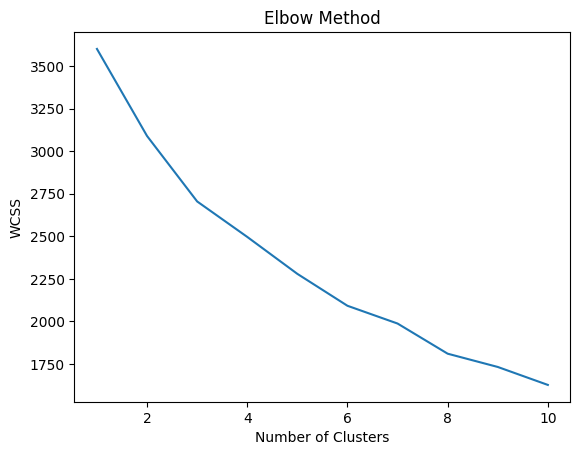

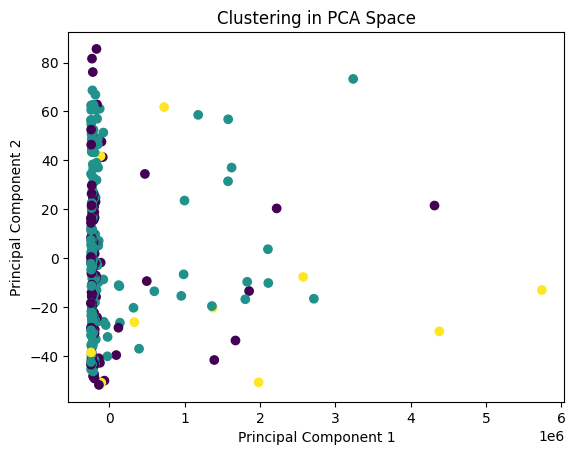

/var/folders/d7/fq94_spj7t7185m44s3lzkrc0000gn/T/ipykernel_73318/557604314.py:50: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [70]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# ... (your data loading and preprocessing)
x = distinct_songs_df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',"msPlayed"]]
top_songs = x.nlargest(300, 'msPlayed')
# Feature scaling
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(top_songs)
pca = PCA(n_components=2)
PCA_dim = pca.fit_transform(top_songs)
pca_df = pd.DataFrame(
    data = PCA_dim,
    columns = ['PC1', 'PC2'])


# Finding the optimal number of clusters (K) using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # within-cluster sum of squares
plt.show()

# From the plot, determine the optimal K and update the KMeans model
optimal_k = 3  # Change this based on the plot
kmeans_model = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)

pca_df['kmeans'] = kmeans_model.fit_predict(x_scaled)

# Visualization (scatter plot in PCA space)
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['kmeans'], cmap='viridis')
plt.title('Clustering in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Get the list of songs that belong to each cluster
cluster_songs = []
for cluster in range(optimal_k):
    songs = distinct_songs_df[pca_df['kmeans'] == cluster][['artistName', 'trackName']]
    cluster_songs.append(songs)

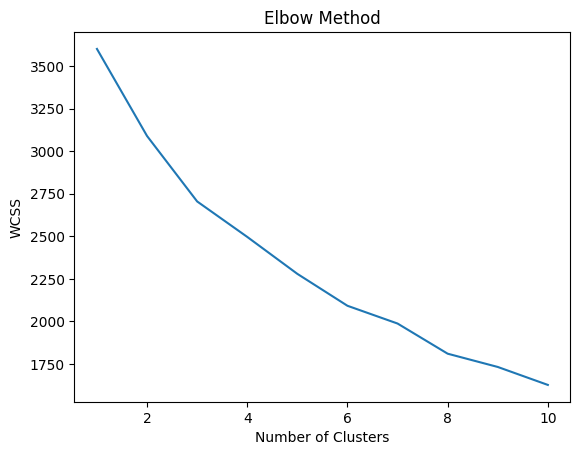

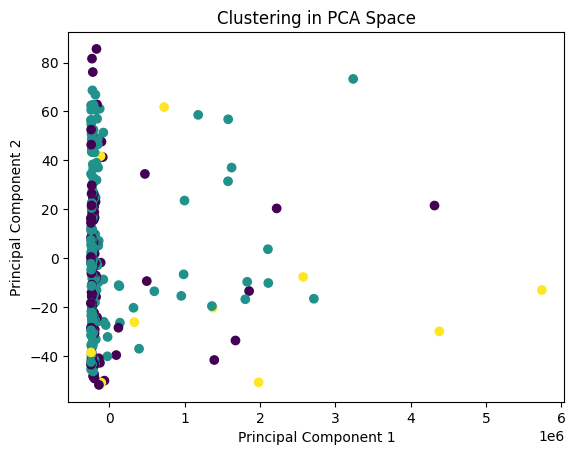

/var/folders/d7/fq94_spj7t7185m44s3lzkrc0000gn/T/ipykernel_73318/2484485960.py:53: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [71]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# ... (your data loading and preprocessing)
x = distinct_songs_df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', "msPlayed"]]
top_songs = x.nlargest(300, 'msPlayed')

# Feature scaling
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(top_songs)
pca = PCA(n_components=2)
PCA_dim = pca.fit_transform(top_songs)
pca_df = pd.DataFrame(
    data=PCA_dim,
    columns=['PC1', 'PC2'])

# Finding the optimal number of clusters (K) using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # within-cluster sum of squares
plt.show()

# From the plot, determine the optimal K and update the KMeans model
optimal_k = 3  # Change this based on the plot
kmeans_model = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)

pca_df['kmeans'] = kmeans_model.fit_predict(x_scaled)

# Reset the index of distinct_songs_df
distinct_songs_df_reset = distinct_songs_df.reset_index(drop=True)

# Visualization (scatter plot in PCA space)
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['kmeans'], cmap='viridis')
plt.title('Clustering in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Get the list of songs that belong to each cluster
cluster_songs = []
for cluster in range(optimal_k):
    songs = distinct_songs_df_reset[pca_df['kmeans'] == cluster][['artistName', 'trackName']]
    cluster_songs.append(songs)


In [126]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

unique_songs_df = df.groupby(['artistName', 'trackName']).agg({
    'danceability': 'mean',
    'energy': 'mean',
    'key': 'mean',
    'loudness': 'mean',
    'mode': 'mean',
    'speechiness': 'mean',
    'acousticness': 'mean',
    'instrumentalness': 'mean',
    'liveness': 'mean',
    'valence': 'mean',
    'tempo': 'mean',
    'msPlayed': 'sum'
}).reset_index()
x = unique_songs_df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', "msPlayed"]]
top_songs = x.sort_values(by=["msPlayed"])
top_songs = top_songs.tail(300)

# Feature scaling
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(top_songs)
pca = PCA(n_components=2)
PCA_dim = pca.fit_transform(x_scaled)
pca_df = pd.DataFrame(
    data=PCA_dim,
    columns=['PC1', 'PC2'])

# Finding the optimal number of clusters (K) using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)


optimal_k = 4  # based on the elbow method
kmeans_model = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)

pca_df['kmeans'] = kmeans_model.fit_predict(x_scaled)

# Combine distinct_songs_df and pca_df based on the index
combined_df = pd.concat([unique_songs_df, pca_df['kmeans']], axis=1)
combined_df.dropna(subset=['kmeans'], inplace=True)


In [122]:
combined_df.dropna(subset=['kmeans'], inplace=True)


In [123]:
combined_df

,artistName,trackName,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,msPlayed,kmeans
0,2 Liter,In The Now,0.540,0.0794,10.0,-20.868,0.0,0.0480,0.8750,0.902000,0.2920,0.175,60.009,139250,0.0
1,24kGoldn,Mood (feat. iann dior),0.701,0.7160,7.0,-3.671,0.0,0.0361,0.1740,0.000000,0.3240,0.732,91.007,512838,0.0
2,31 FAM,Sincero,0.852,0.3200,0.0,-14.734,1.0,0.1830,0.5540,0.229000,0.0909,0.222,100.002,66463,2.0
3,31 FAM,Valentina,0.841,0.5220,9.0,-8.442,0.0,0.0698,0.7530,0.028100,0.1090,0.543,109.050,431558,1.0
4,3AM,Aquí Sigo,0.483,0.5590,9.0,-8.118,1.0,0.0643,0.4950,0.000000,0.0944,0.367,172.752,317638,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Bad Bunny,PERRO NEGRO,0.911,0.7780,5.0,-2.248,1.0,0.2620,0.0887,0.000022,0.1790,0.345,96.057,162767,2.0
296,Bad Bunny,Pa Ti,0.760,0.7180,1.0,-3.017,1.0,0.2320,0.3480,0.000000,0.0982,0.557,128.140,182860,1.0
297,Bad Bunny,Pero Ya No,0.882,0.6120,4.0,-6.103,1.0,0.1180,0.0475,0.000005,0.1820,0.742,147.982,481914,2.0
298,Bad Bunny,Safaera,0.607,0.8290,2.0,-4.074,1.0,0.3790,0.0103,0.000000,0.1070,0.685,96.172,380530,3.0


In [131]:
combined_df[combined_df['kmeans'] == 0.0].sort_values(by=["msPlayed"], ascending=False).head(10)

,artistName,trackName,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,msPlayed,kmeans
197,Anuel AA,Sola (Remix),0.639,0.869,11.0,-4.024,1.0,0.1470,0.2700,0.000000,0.0802,0.767,169.801,15370864,0.0
77,Aitana,Dormir,0.640,0.681,10.0,-5.317,1.0,0.0638,0.0439,0.000125,0.3170,0.423,165.841,9627924,0.0
42,Acereda,CADA VIERNES,0.785,0.627,4.0,-8.685,1.0,0.2900,0.7080,0.000000,0.1700,0.707,126.051,8669630,0.0
245,Azel,Úsame,0.542,0.715,7.0,-5.238,1.0,0.0466,0.1210,0.000000,0.1200,0.370,89.676,7714268,0.0
79,Aitana,El cine,0.613,0.511,7.0,-5.212,1.0,0.0390,0.6020,0.000000,0.1090,0.347,159.890,4540850,0.0
98,Aitana,Quiero - Versión acústica,0.725,0.590,4.0,-4.555,1.0,0.0460,0.7820,0.000000,0.1090,0.384,90.920,4466279,0.0
78,Aitana,Dormir - Versión acústica,0.645,0.437,10.0,-6.999,1.0,0.0412,0.8920,0.000724,0.1450,0.512,165.951,4040067,0.0
80,Aitana,El cine - Versión acústica,0.691,0.431,7.0,-7.148,1.0,0.0388,0.8730,0.000007,0.1170,0.518,143.857,3186114,0.0
63,Agudo,Volar,0.692,0.549,8.0,-10.121,1.0,0.0306,0.6100,0.000000,0.1100,0.609,120.044,2994681,0.0
138,Alexander 23,IDK You Yet - Live on Piano,0.371,0.183,0.0,-11.886,1.0,0.0816,0.9230,0.000030,0.3350,0.187,64.142,2734078,0.0


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23617 entries, 1 to 30271
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   name                     23617 non-null  object        
 1   endTime                  23617 non-null  object        
 2   artistName               23617 non-null  object        
 3   trackName                23617 non-null  object        
 4   secPlayed                23617 non-null  float64       
 5   msPlayed                 23617 non-null  int64         
 6   datetime                 23617 non-null  object        
 7   danceability             23617 non-null  float64       
 8   energy                   23617 non-null  float64       
 9   key                      23617 non-null  int64         
 10  loudness                 23617 non-null  float64       
 11  mode                     23617 non-null  int64         
 12  speechiness              23617 non-nu

In [134]:
track_characteristics = df.groupby('trackName').agg({
    'artistName': 'first',
    'danceability': 'mean',
    'energy': 'mean',
    'key': 'mean',
    'loudness': 'mean',
    'mode': 'mean',
    'speechiness': 'mean',
    'acousticness': 'mean',
    'instrumentalness': 'mean',
    'liveness': 'mean',
    'valence': 'mean',
    'tempo': 'mean',
    'msPlayed': 'sum'
}).reset_index()

track_characteristics = track_characteristics.sort_values(by='msPlayed', ascending=False)
track_characteristics.head(10)


,trackName,artistName,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,msPlayed
2176,POLARIS - Remix,Saiko,0.623,0.79900,8.0,-4.152,0.0,0.0713,0.1530,0.000000,0.3650,0.5520,169.901,62215043
1932,Musica para dormir rápido,Musicas para Relaxar,0.123,0.00376,0.0,-36.577,1.0,0.0420,0.9950,0.982000,0.0753,0.0375,60.657,53963909
548,Columbia,Quevedo,0.668,0.71200,5.0,-5.927,1.0,0.0381,0.3690,0.000021,0.1080,0.2640,100.020,51984044
402,Butterfly Effect (feat. Ymmy),Nevo Angel,0.667,0.62600,11.0,-8.083,1.0,0.1310,0.3120,0.000000,0.1180,0.3570,154.979,51167926
653,DAME,Quevedo,0.742,0.50800,4.0,-5.705,1.0,0.0539,0.3680,0.000027,0.1150,0.3100,98.017,51009054
3413,¿NO SÉ POR QUÉ? - Remix,Bermu,0.718,0.67800,2.0,-9.933,1.0,0.0566,0.7960,0.000000,0.2360,0.9010,145.946,36083557
427,CORRIENDO HACIA TI,Bermu,0.552,0.76700,5.0,-9.590,0.0,0.0578,0.3260,0.000000,0.1870,0.9610,180.036,34649614
1658,Los Cobardes Viven Siempre,Malmö 040,0.568,0.79200,8.0,-4.396,1.0,0.0267,0.0139,0.000000,0.2280,0.5360,99.960,34341341
1964,NO VUELVAS MÁS,Bermu,0.628,0.62700,11.0,-5.091,1.0,0.0362,0.0169,0.000000,0.1100,0.4970,130.004,31039006
2186,PUNTO G,Quevedo,0.751,0.76100,11.0,-4.113,0.0,0.1500,0.2510,0.000238,0.0991,0.5530,92.032,30662138


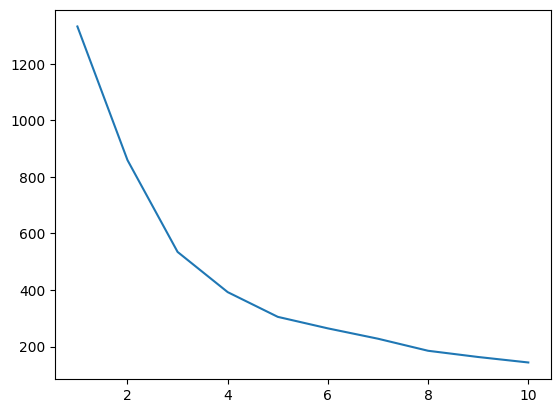

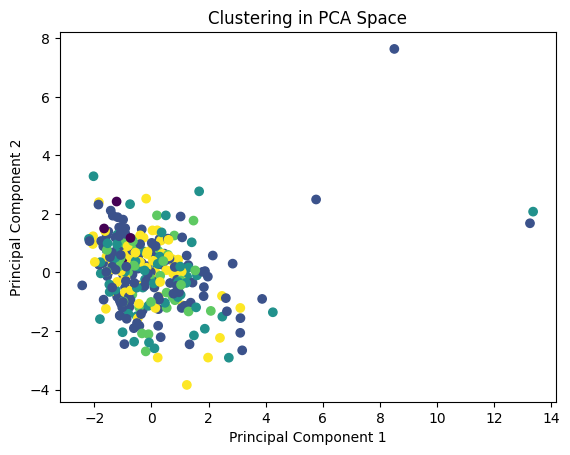

,trackName,artistName,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,msPlayed,cluster
2176,POLARIS - Remix,Saiko,0.623,0.79900,8.0,-4.152,0.0,0.0713,0.1530,0.000000,0.3650,0.5520,169.901,62215043,2
1932,Musica para dormir rápido,Musicas para Relaxar,0.123,0.00376,0.0,-36.577,1.0,0.0420,0.9950,0.982000,0.0753,0.0375,60.657,53963909,2
548,Columbia,Quevedo,0.668,0.71200,5.0,-5.927,1.0,0.0381,0.3690,0.000021,0.1080,0.2640,100.020,51984044,4
402,Butterfly Effect (feat. Ymmy),Nevo Angel,0.667,0.62600,11.0,-8.083,1.0,0.1310,0.3120,0.000000,0.1180,0.3570,154.979,51167926,3
653,DAME,Quevedo,0.742,0.50800,4.0,-5.705,1.0,0.0539,0.3680,0.000027,0.1150,0.3100,98.017,51009054,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,2:50 Remix,MYA,0.818,0.81200,9.0,-4.425,1.0,0.0475,0.1120,0.000000,0.2340,0.8440,139.966,2978773,4
1550,Lady Madrid,Pereza,0.598,0.65500,0.0,-2.761,1.0,0.0256,0.3590,0.000000,0.0922,0.3770,115.041,2953537,3
1605,Limón y Sal,Julieta Venegas,0.634,0.64900,11.0,-6.056,1.0,0.0255,0.1380,0.000000,0.2880,0.4910,111.030,2951292,4
959,Enciéndeme,Hakuna Group Music,0.555,0.82400,4.0,-6.007,1.0,0.0804,0.0119,0.000002,0.1120,0.6590,133.885,2940687,0


In [154]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Select the top 300 most listened songs
top_songs = track_characteristics.nlargest(300, 'msPlayed')

# Extract the relevant features for clustering
features = top_songs[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','msPlayed']]

# Scale the features
scaler = preprocessing.StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

pca_df = pd.DataFrame(
    data=pca_features,
    columns=['PC1', 'PC2'])


# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow method to determine the optimal number of clusters
# (inspect the plot and choose the appropriate number of clusters)
plt.plot(range(1, 11), wcss)
plt.show()

# Train a KMeans clustering model with the optimal number of clusters
optimal_k = 5  # Change this based on the elbow method plot
kmeans_model = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_model.fit(pca_features)
pca_df['kmeans'] = kmeans_model.fit_predict(x_scaled)



plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['kmeans'], cmap='viridis')
plt.title('Clustering in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



# Assign cluster labels to the songs
cluster_labels = kmeans_model.labels_

# Add the cluster labels as a new column to the track_characteristics dataset
top_songs['cluster'] = cluster_labels

# Return the track_characteristics dataset with the new cluster column
top_songs


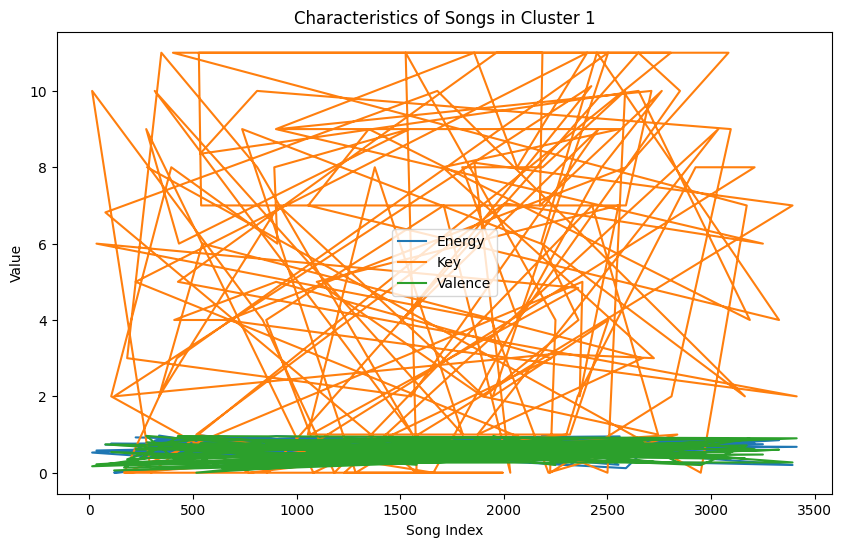

In [159]:
import matplotlib.pyplot as plt

# Filter the songs in cluster 1
cluster_1_songs = top_songs[top_songs['cluster'] == 1]

# Plot the characteristics of the songs in cluster 1
plt.figure(figsize=(10, 6))
plt.plot(cluster_1_songs['energy'], label='Energy')
plt.plot(cluster_1_songs['key'], label='Key')
plt.plot(cluster_1_songs['valence'], label='Valence')
# Add more characteristics as needed

plt.xlabel('Song Index')
plt.ylabel('Value')
plt.title('Characteristics of Songs in Cluster 1')
plt.legend()
plt.show()



In [165]:
import seaborn as sns

<Axes: xlabel='danceability', ylabel='tempo'>

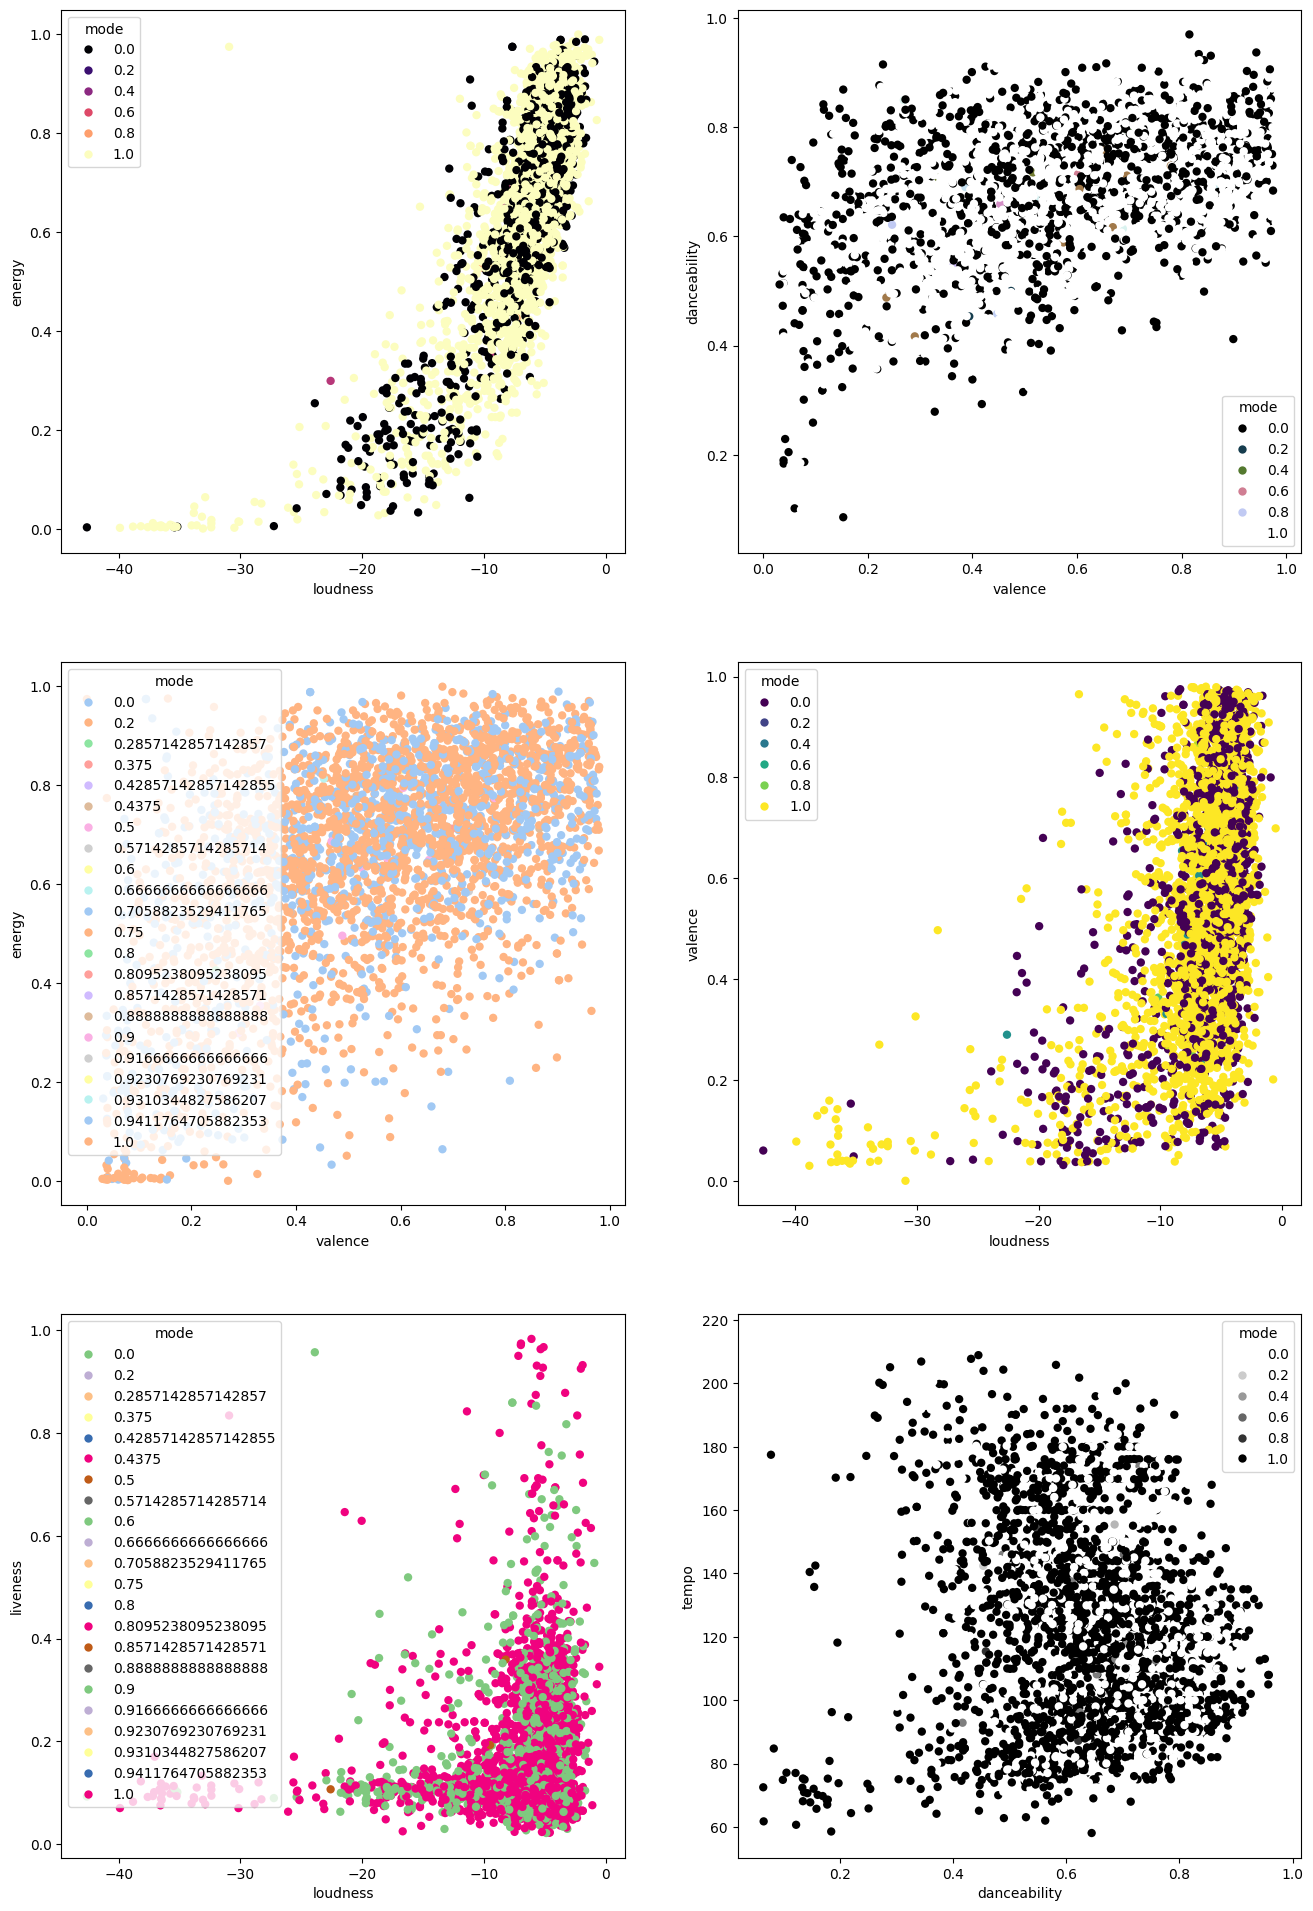

In [166]:
f, ax = plt.subplots(3,2, figsize=(16,24))

sns.scatterplot(x="loudness", y="energy",
                hue="mode", 
                palette="magma",
                sizes=(1, 8), linewidth=0,
                data=track_characteristics, ax=ax[0][0])

sns.scatterplot(x="valence", y="danceability",
                hue="mode", 
                palette="cubehelix",
                sizes=(1, 8), linewidth=0,
                data=track_characteristics, ax=ax[0][1])

sns.scatterplot(x="valence", y="energy",
                hue="mode", 
                palette="pastel",
                sizes=(1, 8), linewidth=0,
                data=track_characteristics, ax=ax[1][0])

sns.scatterplot(x="loudness", y="valence",
                hue="mode", 
                palette="viridis",
                sizes=(1, 8), linewidth=0,
                data=track_characteristics, ax=ax[1][1])

sns.scatterplot(x="loudness", y="liveness",
                hue="mode", 
                palette="Accent",
                sizes=(1, 8), linewidth=0,
                data=track_characteristics, ax=ax[2][0])

sns.scatterplot(x="danceability", y="tempo",
                hue="mode", 
                palette="binary",
                sizes=(1, 8), linewidth=0,
                data=track_characteristics, ax=ax[2][1])